# Heart Failure Dataset, Pandas, and ML

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
data.shape

(918, 12)

#### let's devide our dataset's columns according to categories
*symptom columns*
-   ChestPainType, RestingBP, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope

*factors columns*
-   Age, Sex, RestingBP, Cholesterol, FastingBS, MaxHR

our columns which may affect as factores are:
Age, Sex, RestingBP, Cholesterol, FastingBS, MaxHR

In [24]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [25]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [3]:
up_1=data[(data['ST_Slope']=='Up') & (data['HeartDisease']==1)]
up_1.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1


In [5]:
up_0=data[(data['ST_Slope']=='Up') & (data['HeartDisease']==0)]
up_0.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [6]:
down_1=data[(data['ST_Slope']=='Down') & (data['HeartDisease']==1)]
down_1.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
247,48,M,ASY,122,275,1,ST,150,Y,2.0,Down,1
303,62,F,ASY,120,0,1,ST,123,Y,1.7,Down,1


In [7]:
down_0 = data[(data['ST_Slope']=='Down') & (data['HeartDisease']==0)]
down_0.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
307,53,M,ATA,130,0,0,ST,120,N,0.7,Down,0
314,53,M,ASY,80,0,0,Normal,141,Y,2.0,Down,0


In [8]:
flat_1=data[(data['ST_Slope']=='Flat') & (data['HeartDisease']==1)]
flat_1.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1


In [9]:
flat_0=data[(data['ST_Slope']=='Flat') & (data['HeartDisease']==0)]
flat_0.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
15,54,F,ATA,120,273,0,Normal,150,N,1.5,Flat,0
21,44,M,ATA,120,184,0,Normal,142,N,1.0,Flat,0


down_0     14
down_1     49
up_0      317
up_1       78
flat_0     79
flat_1    381
dtype: int64

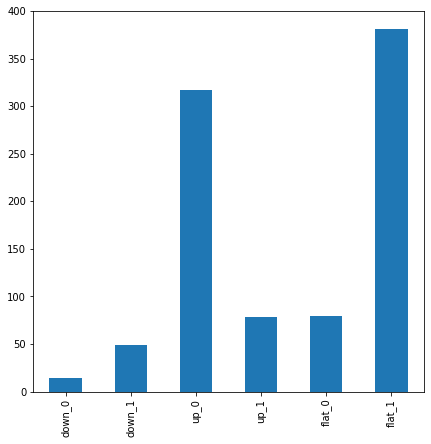

In [15]:
vals = [down_0.shape[0], down_1.shape[0], up_0.shape[0], up_1.shape[0], flat_0.shape[0], flat_1.shape[0]]
cols = ['down_0', 'down_1', 'up_0', 'up_1', 'flat_0', 'flat_1']
sloppe_disease = pd.Series(vals, cols)
sloppe_disease.plot.bar(figsize=(7, 7))
sloppe_disease

In [51]:
flat_1.ExerciseAngina[flat_1.ExerciseAngina=='N'] = 0
flat_1.ExerciseAngina[flat_1.ExerciseAngina== 'Y']= 1
flat_1

/tmp/ipykernel_8638/2460225538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flat_1.ExerciseAngina[flat_1.ExerciseAngina=='N'] = 0
/home/irfan/.local/share/virtualenvs/pandas-IIxn-Q33/lib/python3.9/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/tmp/ipykernel_8638/2460225538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flat_1.ExerciseAngina[flat_

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,0,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,1,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,1,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,1,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,1,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241,0,Normal,123,1,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,1,1.2,Flat,1


<AxesSubplot:>

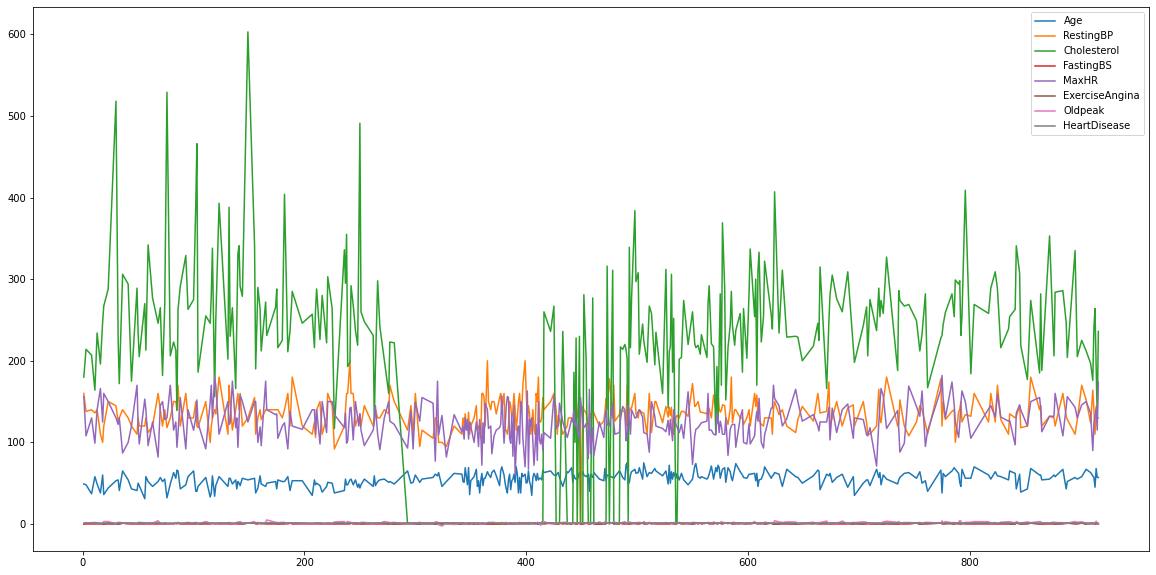

In [53]:
flat_1.plot(figsize=(20,10))

In [48]:
flat_1['Cholesterol'][(flat_1.RestingECG=='ST') & (flat_1.Cholesterol > 400)].unique()

array([], dtype=int64)

In [34]:
diff()

NameError: name 'diff' is not defined